<b><i>ANALIZA DATASET

Bolocan Crina-Maria
BEIA-task(AI/ML courses)

Context

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?

Rezervarile online ale hotelului s-au schimbat dramatic, inclusiv comportamentul celor care fac rezervarea. Rolul acestui cod e pentru a analiza numeroasele motive si cauze ale acestor comportamente si pentru a prezice daca un client, un oaspete va anula sau nu.

Importarea si instalarea bibliotecilor necesare

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install sklearn
%pip install scipy
%pip install xgboost
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# configurarea stilului de afisare a graficelor
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, r2_score

# ignor warning-urile
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
# Citirea fisierului CSV
df = pd.read_csv(r"Hotel Reservations.csv")

# Scrierea datasetului intr-un nou fisier CSV
print("Primele 5 randuri din datasetul initial sunt salvate in fisierul New_Hotel_Reservations.csv [Hotel Reservations.csv]")
df.head().to_csv(r"New_Hotel_Reservations.csv", index=False)

Primele 5 randuri din datasetul initial sunt salvate in fisierul New_Hotel_Reservations.csv [Hotel Reservations.csv]


In [4]:
import io
# Obtinerea informatiilor despre dataset
buffer = io.StringIO() # flux de memorie care functioneaza similar unui fisier
df.info(buf=buffer) #afiseaza informatii, intrari, nume de coloane, tipuri de date, cantitate de memorie utilizata
info_str = buffer.getvalue() # returneaza continutul sub forma de string

# Scrierea informatiilor intr-un fisier text
with open(r"Hotel_Reservations_Info.txt", "w") as f:
    f.write(info_str)

print("Informatiile despre dataset au fost scrise in 'Hotel_Reservations_Info.txt'.")

Informatiile despre dataset au fost scrise in 'Hotel_Reservations_Info.txt'.


In [5]:
print("Valori lipsa in dataset:\n", df.isnull().sum())

Valori lipsa in dataset:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


Nu sunt valori lipsa in dataset.

In [6]:
print("Valori unice in dataset:\n", df.nunique())

Valori unice in dataset:
 Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


Am observat cazurile in care avem valori unice pentru o analiza mai buna a datelor.

In [7]:
print(f'Duplicated Rows Present in the dataset: {df.duplicated().sum()}')

Duplicated Rows Present in the dataset: 0


In [8]:
import io

# Obținerea descrierii statistice a datelor
description = df.describe().transpose()
description_str = description.to_string()

# Scrierea descrierii statistice într-un fișier text
with open(r"Hotel_Reservations_Description.txt", "w") as f:
    f.write("Descriere statistica a datelor:\n")
    f.write(description_str)
    
print("Descrierea statistica a datelor a fost scrisa in 'Hotel_Reservations_Description.txt'.")


Descrierea statistica a datelor a fost scrisa in 'Hotel_Reservations_Description.txt'.


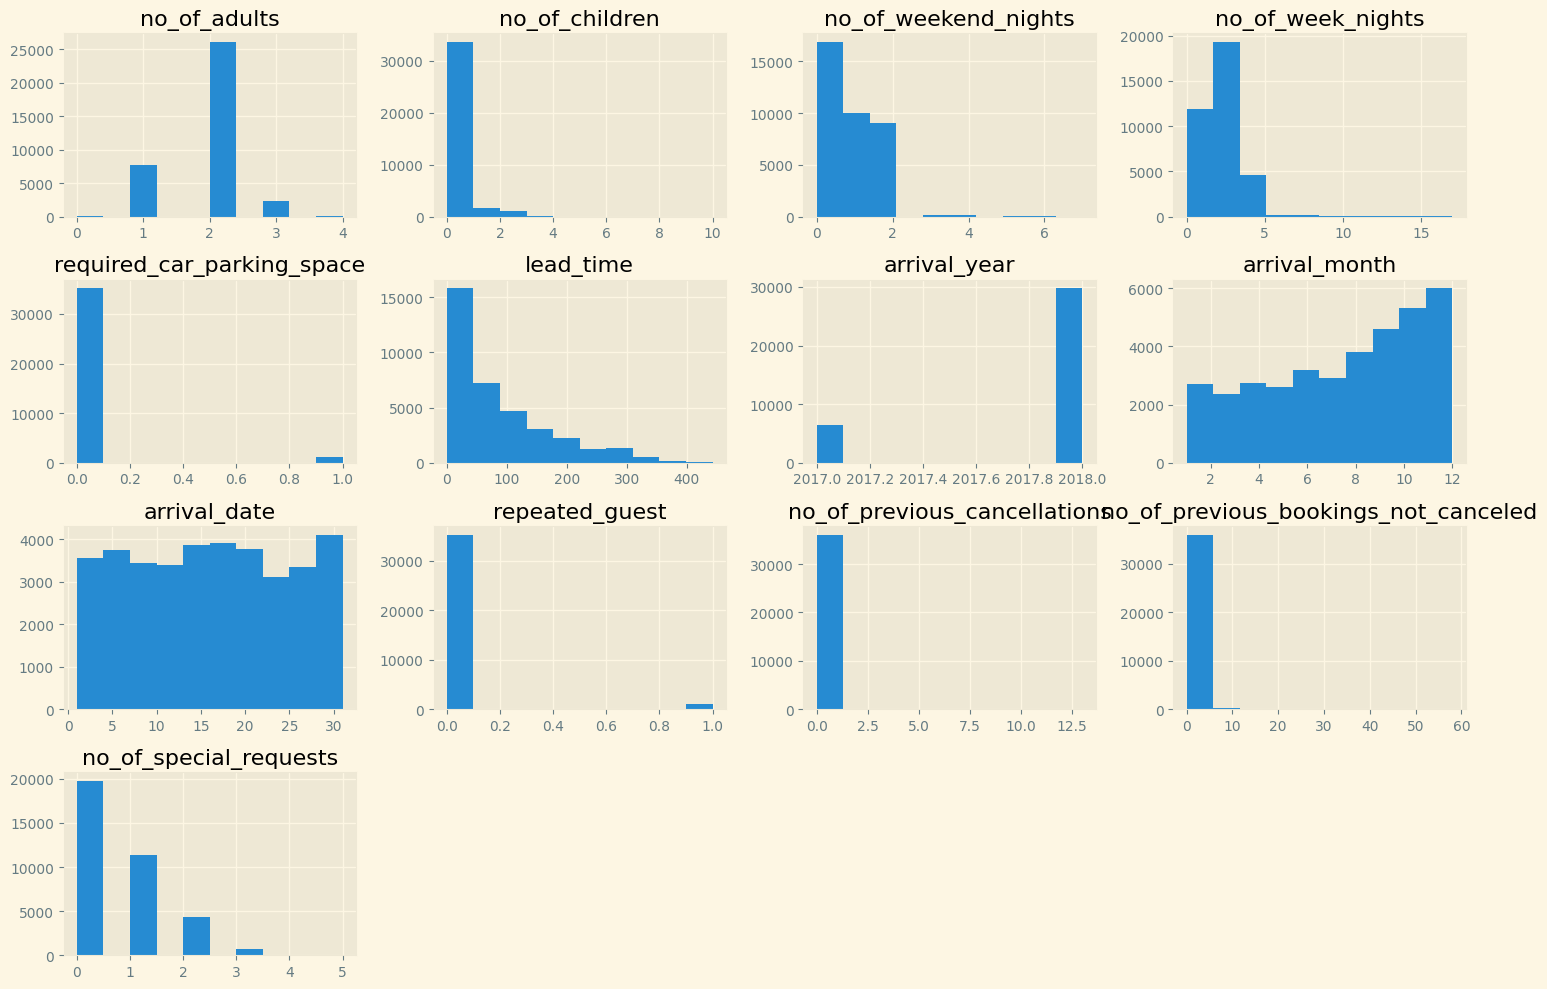

In [9]:
features = df.drop(columns=['avg_price_per_room'])
features.hist(figsize=(15, 10)) # se creaza o histograma pentru fiecare coloana
plt.tight_layout() # se asigura ca nu se suprapun subgraficele
plt.show()

Subgraficele arata distributiile diferitelor variabile numerice din datasetul "Hotel Reservations". Fiecare subplot reprezinta o histograma care arata frecventa valorilor pentru fiecare variabila.

Analiza grafica a datasetului

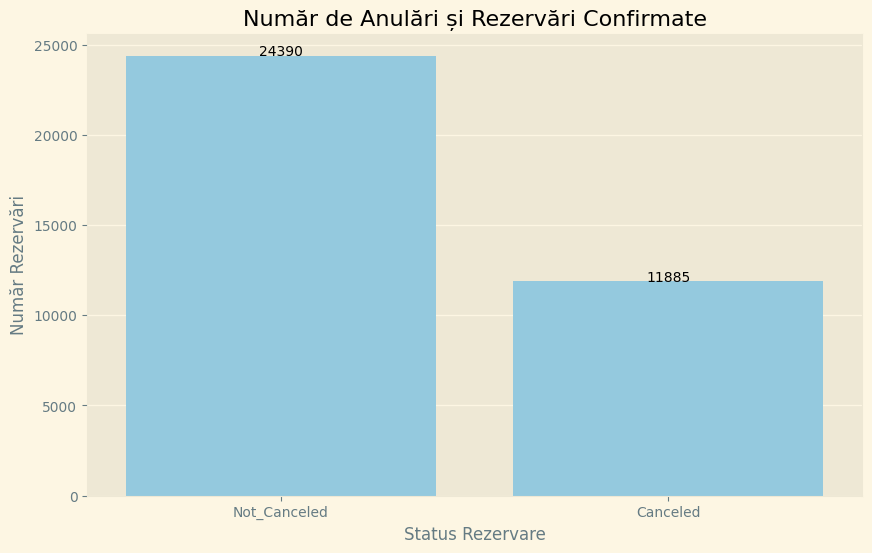

In [10]:
# Grafic pentru a arata numarul de rezervari pe an confirmate si anulate
cancellation_counts = df['booking_status'].value_counts().reset_index()
cancellation_counts.columns = ['booking_status', 'count']

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='booking_status', y='count', data=cancellation_counts, color = 'skyblue')

# se produce un tuplu pentru fiecare rand din dataframe, unde indexul este valoarea din coloana 'booking_status'
for index, row in cancellation_counts.iterrows():
    bar_plot.text(row.name, row['count'], round(row['count'], 2), color='black', ha="center")
    # se adauga textul inaltimei fiecarei bare

plt.title('Număr de Anulări și Rezervări Confirmate')
plt.xlabel('Status Rezervare')
plt.ylabel('Număr Rezervări')
plt.show()

Graficul reprezinta numarul de anulari si rezervari confirmate, rezervarile neanulate fiind de 2 ori mai mlte decat rezervarile anulate => majoritatea clientilor isi ororeaza rezervarile.

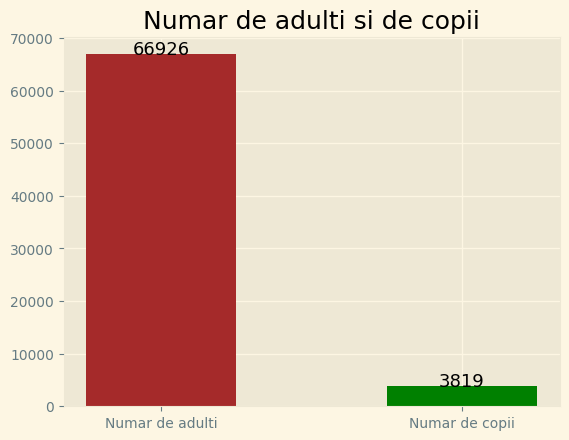

In [11]:
# Grafic pentru numarul de adulti si copii
fig, ax = plt.subplots() #creaza figura si axa
ax.bar(np.arange(2),[df.no_of_adults.sum(), df.no_of_children.sum()], width=0.5, color = ["brown","green"]) # crearea graficului cu bare
plt.xticks(np.arange(2), ("Numar de adulti", "Numar de copii")) # setarea etichetelor axei x
plt.title("Numar de adulti si de copii", color="black", fontsize=18);
for i, v in enumerate([df.no_of_adults.sum(), df.no_of_children.sum()]):
    ax.text(i, v + 0.5, str(v), ha='center', color="black", fontsize=13)
    # i = pozitia barului, v = valoarea sumata per bar, v+0.5 = pozitia sumei, se centreaza, coloare + font

Numarul de adulti e semnificativ mai mare decat numarul de copii, ceea ce reprezinta ca majoritatea clientilor pot veni din randul salariatilor, intereselor de servici sau strict de relaxare(inafara familiei). In acelasi timp, am putea presupune ca majoritatea sunt la varsta mijlocie sau mica, tocmai din pricina numarului de copii.

In [12]:
# Conversia etichetei 'booking_status' in numeric
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

#Functia pentru a plota rata de anulare in functie de o caracteristica
def plot_cancellation_rate_by_feature(feature):
    cancellation_rate = df.groupby(feature)['booking_status'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='booking_status', data=cancellation_rate, palette='viridis')
    plt.title(f'Cancellation Rate/ Rata de anulare by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cancellation Rate/Rata de anulare')
    plt.show()

C:\Users\Crina Maria\AppData\Local\Temp\ipykernel_30004\3938190404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='booking_status', data=cancellation_rate, palette='viridis')


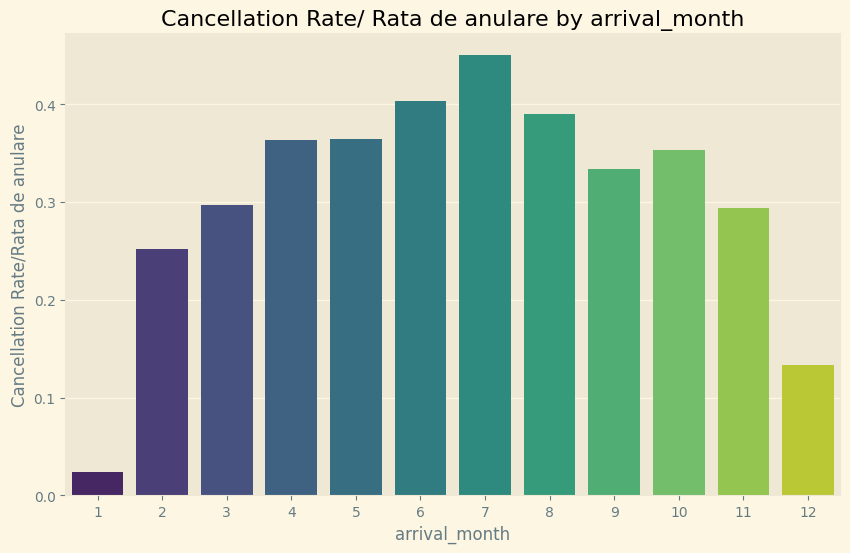

In [13]:
plot_cancellation_rate_by_feature('arrival_month')

Am facut urmatoarele histograme pentru a arata modul in care fiecare luna si an poate afecta ratele de anulare.

Rata medie de anulari este de aproximativ 10%.
Rata de anulari este cea mai mare in lunile de vara, unde ajunge la aproximativ 20%.
Rata de anulari este cea mai mica in lunile de iarna, cand rata de anulari ajunge la aproximativ 5%.

Factori care pot influenta rata de anulari:
- vremea
- sarbatorile
- zilele libere

C:\Users\Crina Maria\AppData\Local\Temp\ipykernel_30004\3520361778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.booking_status, y=df.lead_time, palette=sns.color_palette(["#daa520", "#a52a2a"]))


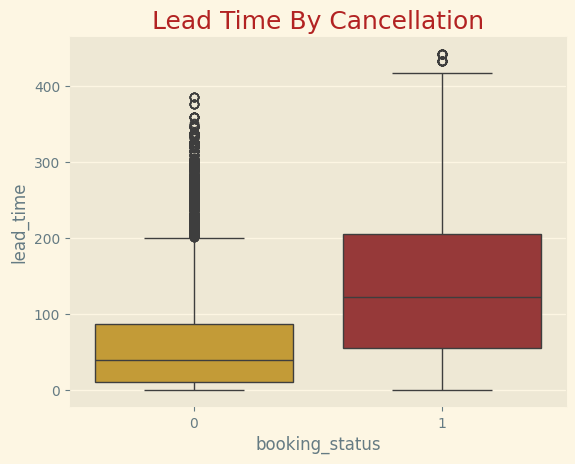

In [14]:
sns.boxplot(x=df.booking_status, y=df.lead_time, palette=sns.color_palette(["#daa520", "#a52a2a"]))
plt.title("Lead Time By Cancellation", color="#b22222", fontsize=18)
plt.show()

Graficul reprezinta un boxplot al timpului de livrare in functie de starea de rezervare.
Media timpului de livrare pentru rezervarile cu starea 1, rezervarile anulate, este de aproximativ 120 de unitati. IQR(portiunea centrala a distributiei) este de aproximativ 150 de unitati. Exista un mic nr de puncte iesite din tipar, aberante.
Iar pentru starea 0, rezervarile neanulate, timpul de livrare e mai mic, media fiind undeva la 40-50 de unitati. In schimb, sunt multe anomalii, outliers, ceea ce inseamna ca nu exista neaparat anumiti factori tipici care sa influenteze timpul de livrare pentru rezervarile neanulate.

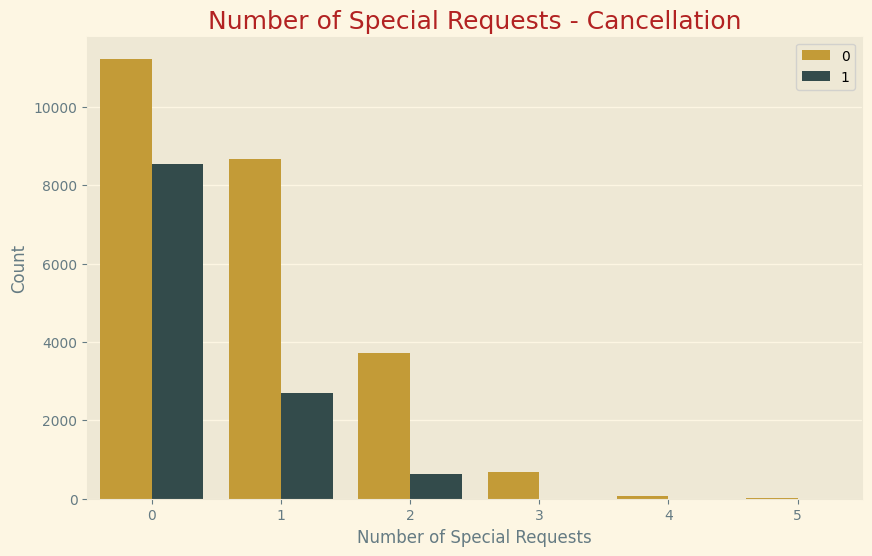

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=df, palette=sns.color_palette(["#daa520", "#2f4f4f"]))
plt.title("Number of Special Requests - Cancellation", color="#b22222", fontsize=18)
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

Rata de anulare este mai mare pentru clientii care nu au o rezervare speciala fata de cei care nu au ceva special in rezervare. Probabil, factorul cheie reprezinta respectarea conditiilor. Valorile 0, 1, 2, 3, 4, 5 sunt tipuri de cereri speciale(numarul lor).

In [16]:
nr_clienti_repetati = df[(df['repeated_guest'] == 1)].shape[0]
print(nr_clienti_repetati)
numar_repetitori_canceled = df[(df['repeated_guest'] == 1) & (df['booking_status'] == 1)].shape[0]
print(f'Numărul de rezervări anulate de către clienții care au mai fost la hotel: {numar_repetitori_canceled}')
numar_repetitori_not_canceled = df[(df['repeated_guest'] == 1) & (df['booking_status'] == 0)].shape[0]
print(f'Numărul de rezervări confirmate de către clienții care au mai fost la hotel: {numar_repetitori_not_canceled}')

nr_clienti_noi = df[(df['repeated_guest'] == 0)].shape[0]
print(nr_clienti_noi)
numar_noi_canceled = df[(df['repeated_guest'] == 0) & (df['booking_status'] == 1)].shape[0]
print(f'Numărul de rezervări anulate de către clienții care nu au mai fost la hotel: {numar_noi_canceled}')
numar_noi_not_canceled = df[(df['repeated_guest'] == 0) & (df['booking_status'] == 0)].shape[0]
print(f'Numărul de rezervări confirmate de către clienții care nu au mai fost la hotel: {numar_noi_not_canceled}')

930
Numărul de rezervări anulate de către clienții care au mai fost la hotel: 16
Numărul de rezervări confirmate de către clienții care au mai fost la hotel: 914
35345
Numărul de rezervări anulate de către clienții care nu au mai fost la hotel: 11869
Numărul de rezervări confirmate de către clienții care nu au mai fost la hotel: 23476


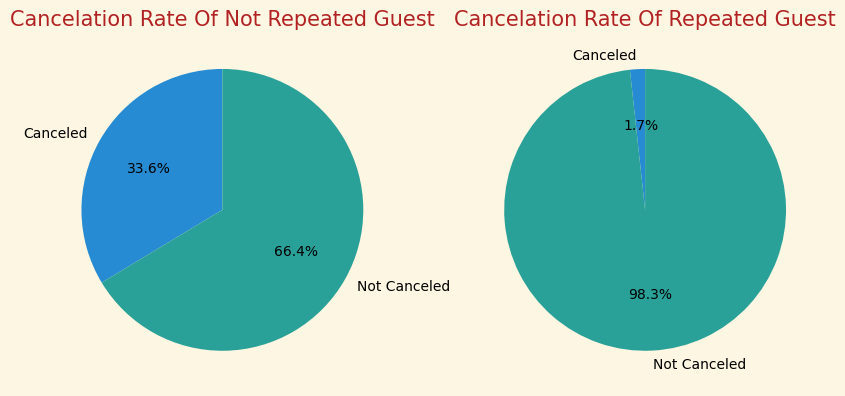

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([11896,23476], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Cancelation Rate Of Not Repeated Guest",color="#b22222",fontsize=15)
ax[1].pie([16,914], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Cancelation Rate Of Repeated Guest",color="#b22222",fontsize=15);

Mai sus am reprezentat 2 grafice cu tort care prezinta rata de anulare a rezervarilor atat pentru oaspetii repetati, fideli, cat si pentru cei noi.
Rata de anulare pentru oaspetii noi este semnificativ mai mare decat rata de anulare pentru oaspetii repetati. In schimb, proportia de respectare a cererii e mai mare fata de cea de anulare pentru ambele categorii.
Un factor important poate reprezenta frica de necunoscut si necunostiinta mediului.

Date numerice:
- 66,4% nu si au anulat sederea in categoria celor noi
- 99,3% nu si au anulat sederea in categoria oaspetilor fideli, vechi

In [18]:
df.booking_status = df.booking_status.replace({"Not_Canceled":0, "Canceled":1})

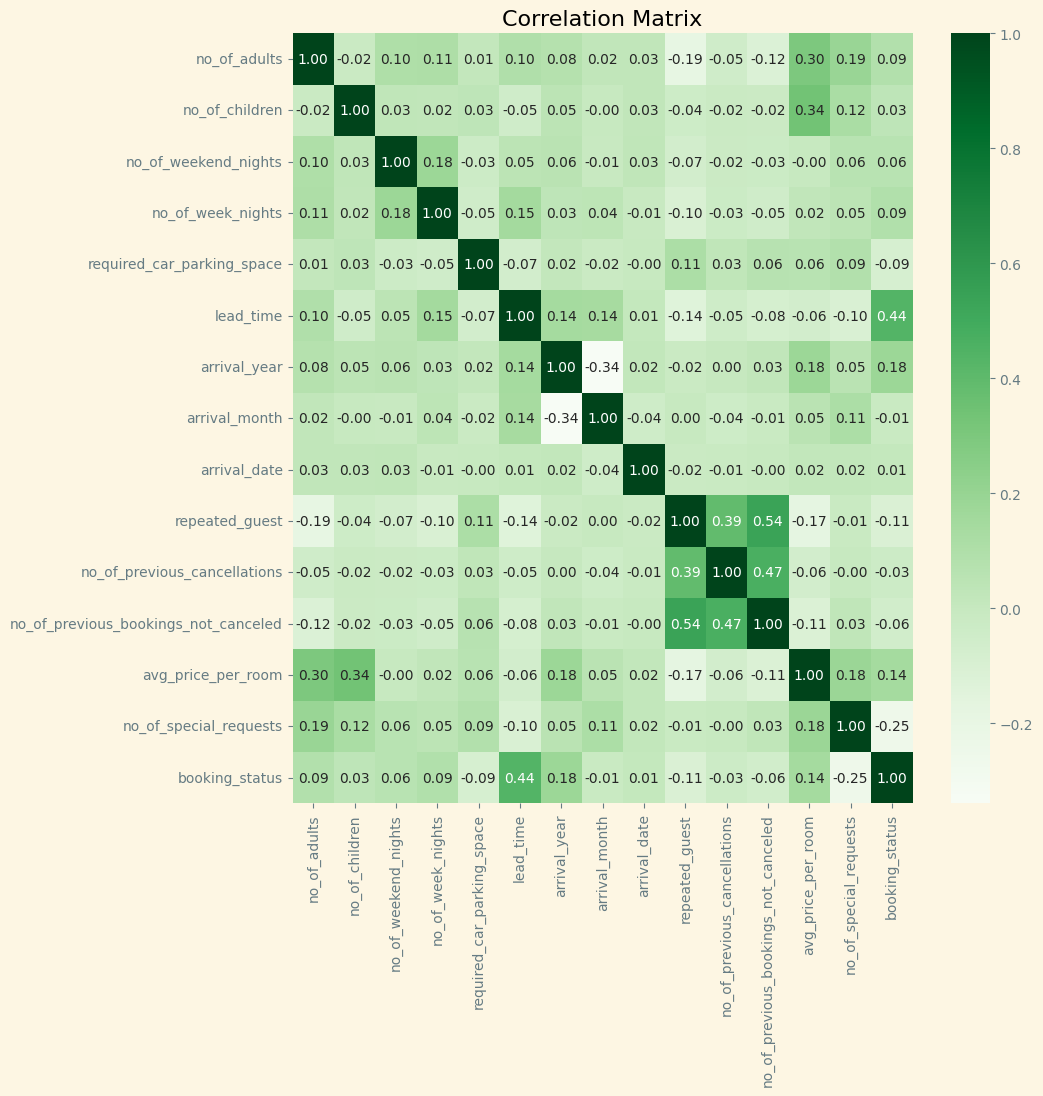

In [19]:
# Selectez doar coloanele numerice
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# selecteaza doar anumite tipuri de date

# matricea de corelatie, calcularea matricei, se calculeaza 
# coeficientii de corelatie pentru toate perechile de coloane
corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(10, 10))
# matricea de corelatie, afiseaza valorile coeficientilor, 2 zecimale, paleta de culori
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

Matricea de corelatie prezentata in imagine ofera o analiza vizuala a relatiilor statistice (corelatiilor) dintre variabilele include in dataset.
Relatii PUTERNIC POZITIVE:
- no_of_previous_cancellations si booking_status:
coeficientul de 0.44 sugereaza o relatie pozitiva moderata intre numarul de anulari anterioare si statutul rezervarii. Clientii cu mai multe anulari anterioare sunt mai predispusi sa-si anuleze rezervarea.
- no_of_special_requests si booking_status: 
coeficientul este de 0.25, ceea ce reprezinta ca o crestere a cererilor speciale poate fi asociata cu o mare probabilitate de a nu anula rezervarea.

Relatii PUTERNIC NEGATIVE:
- lead_time și booking_status:
coeficientul de -0.29 indică o relatie negativa moderata intre timpul de așteptare si statutul rezervarii. Cu cat timpul de asteptare este mai lung, cu atat este mai probabil ca rezervarea sa fie anulata.
- no_of_special_requests si lead_time:
coeficientul de -0.20 sugereaza ca mai multe cereri speciale sunt asociate cu un timp de asteptare mai scurt.

Corelatii notabile intre alte variabile:
- no_of_previous_bookings_not_canceled și repeated_guest:
coeficientul de 0.47 indica o relatie pozitiva moderata intre numarul de rezervari anterioare care nu au fost anulate si faptul ca un client este un oaspete repetat.


In [20]:
from sklearn.decomposition import PCA
# Principal Component Analysis
# PCA este o tehnica utilizata pentru reducerea dimensionalitatii seturilor de date
# creeaza un obiect PCA care va reduce datele la o componenta principala
pca = PCA(n_components=1)
# transformam toate datele intr o singura variabila
pca_no_people = pca.fit_transform(df[["no_of_adults","no_of_children"]])
df["no_of_people"] = pca_no_people

df.drop(columns=["no_of_adults","no_of_children"],inplace=True)

Am folosit PCA pe aceste coloane, deoarece sunt foarte legate între ele.
In acest fel, le putem combina intr-o singura caracteristica, pentru a beneficia de ambele, mai degraba decat sa alegem una.

In [21]:
pca_no_week = pca.fit_transform(df[["no_of_weekend_nights","no_of_week_nights"]])
df["no_of_week_days"] = pca_no_week

df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

In [22]:
df.head()

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days
0,INN00001,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,0.158982,-0.168923
1,INN00002,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,0.158982,0.987358
2,INN00003,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,-0.840274,-0.983180
3,INN00004,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,0.158982,-0.339934
4,INN00005,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,0.158982,-1.154192


In [23]:
# gruparea si contorizarea rezervarilor dupa luna si statutul rezervarii
grby_month_book = df.groupby(["arrival_month","booking_status"]).count().reset_index()
list_of_months = []
# calcularea ratei de anulare (procent) pentru fiecare luna
for i in range(1,13):
    x = grby_month_book[grby_month_book.arrival_month == i]
    rate = x[x.booking_status == 1].Booking_ID.values / x[x.booking_status == 0].Booking_ID.values * 100
    list_of_months.append(rate)

# conversia listei in serie pandas pentru a putea fi afisata
pd.Series(list_of_months)

0     [2.4242424242424243]
1      [33.75196232339089]
2      [42.21954161640531]
3      [57.15106260769672]
4      [57.45454545454546]
5      [67.52092050209205]
6      [81.81818181818183]
7                   [64.0]
8     [50.048812235600394]
9      [54.69886528949666]
10     [41.56769596199525]
11    [15.349369988545247]
dtype: object

Fiecare element din lista reprezinta rata de anulare pentru o luna specifica.
Observatii:
- ratele de anulare variaza semnificativ intre luni, de la un minim de 2.42% in ianuarie la un maxim de 81.82% in august.

Alt factor important: sezonalitatea.

In [24]:
df.arrival_month = df.arrival_month.replace({3:1, 4:1, 5:1, 6:1, 7:1, 9:1, 1:0, 2:0, 8:0, 10:0, 11:0, 12:0})

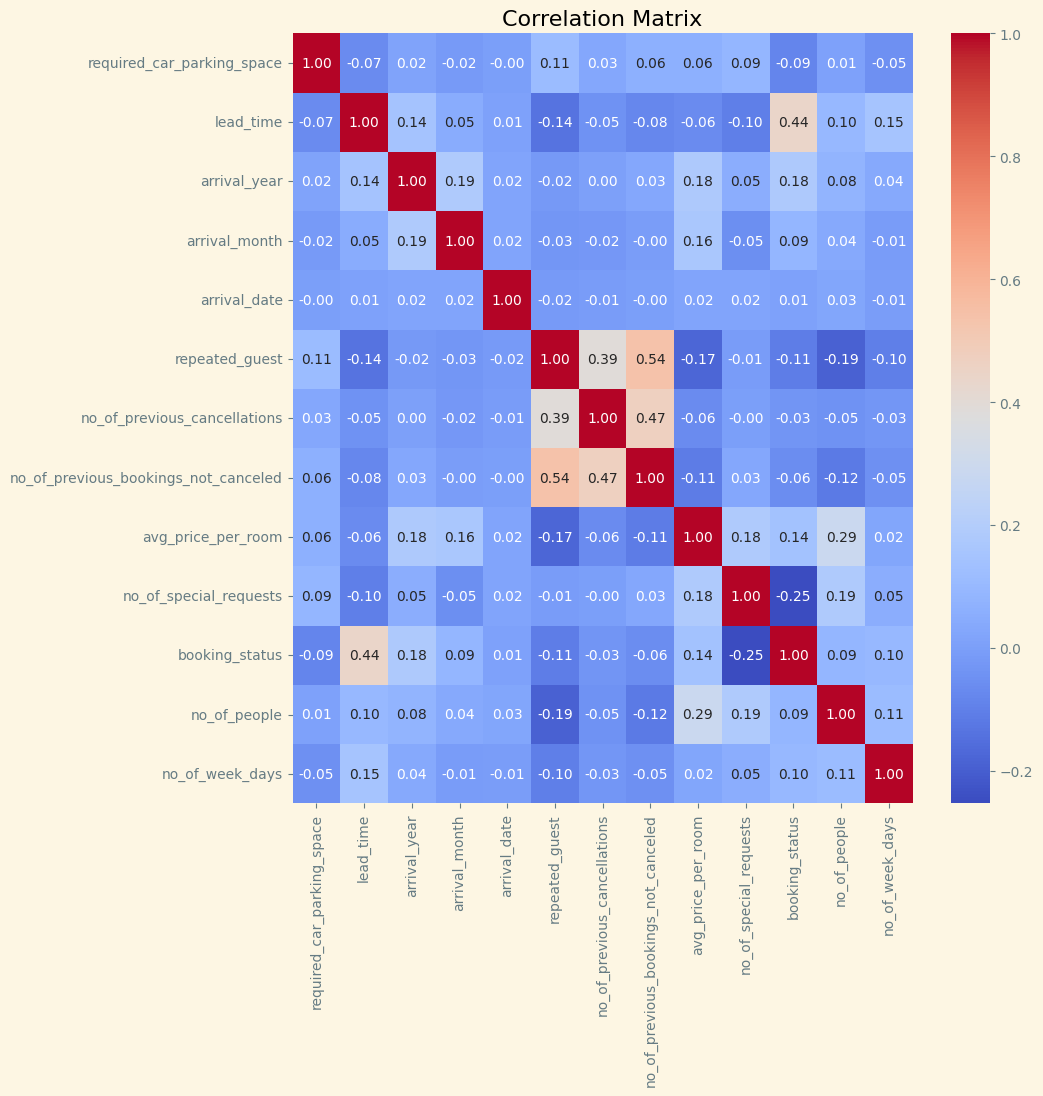

In [25]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Corelatii POZITIVE MODERATE:
- booking_status si lead_time (0.44):
o rezervare cu un timp de anticipare/asteptare mai mare este mai probabil sa fie anulata.
- booking_status si no_of_special_requests (-0.25):
mai multe cereri speciale sunt asociate cu o probabilitate mai mica de anulare.
- repeated_guest si cancellations_rate (0.47):
oaspetii care au revenit anterior au o rata mai mare de anulare.

Corelatii NEGATIVE MODERATE:
- booking_status si avg_price_per_room (-0.18):
pretul mediu per camera este mai mic pentru rezervarile anulate.
- no_of_special_requests si avg_price_per_room (0.18):
mai multe cereri speciale sunt asociate cu preturi mai mari per camera.

Corelatii SCAZUTE:
majoritatea corelatiilor dintre variabile sunt slabe (aproape de 0), indicand ca nu exista o relatie liniara puternica intre multe dintre aceste variabile.

Booking_ID” este doar un identificator si nu o caracteristica care poate afecta rezultatul, asa ca il vom exclude.
Nu vom include „arrival_date” din cauza corelarii sale scazute cu starea rezervarii.
Desi „arrival_year” arata o corelatie decenta, nici pe aceasta nu o vom include. Acest set de date include doar anii 2017 și 2018, care nu sunt folositori pentru prezicerea tendintelor viitoare. Evenimente specifice, de exemplu: o pandemie în 2018, dar nu în 2017, ar putea denatura rezultatele prin afectarea anularilor.
Vom exclude „room_type_reserved” deoarece este legat de „avg_price_per_room”, care are o corelatie mai mare si este mai semnificativ pentru analiza noastra.
De asemenea, vom renunta la „cancellations_rate” deoarece nu are o corelatie puternica cu variabila tinta.

In [26]:
df.drop(columns=["Booking_ID","room_type_reserved","arrival_year",
                 "arrival_date"],inplace=True)

In [27]:
# Scalez valorile numerice
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
# RobustScaler este folosit pentru a scala caracteristicile
# folosind statistici care sunt robuste la outliers (IQR)
df[["lead_time","avg_price_per_room","no_of_people","no_of_week_days","no_of_special_requests"]] = scaler.fit_transform(df[["lead_time","avg_price_per_room","no_of_people","no_of_week_days","no_of_special_requests"]])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   type_of_meal_plan                     36275 non-null  object 
 1   required_car_parking_space            36275 non-null  int64  
 2   lead_time                             36275 non-null  float64
 3   arrival_month                         36275 non-null  int64  
 4   market_segment_type                   36275 non-null  object 
 5   repeated_guest                        36275 non-null  int64  
 6   no_of_previous_cancellations          36275 non-null  int64  
 7   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 8   avg_price_per_room                    36275 non-null  float64
 9   no_of_special_requests                36275 non-null  float64
 10  booking_status                        36275 non-null  int64  
 11  no_of_people   

In [29]:
print(df.market_segment_type.value_counts())
print(df.type_of_meal_plan.value_counts())

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64


In [30]:
# One-hot encoding pentru coloanele categorice
df = pd.get_dummies(df,columns=["type_of_meal_plan","market_segment_type"])
# pd.get_dummies este folosit pentru a transforma variabilele categoriale in variabile numerice

<Axes: >

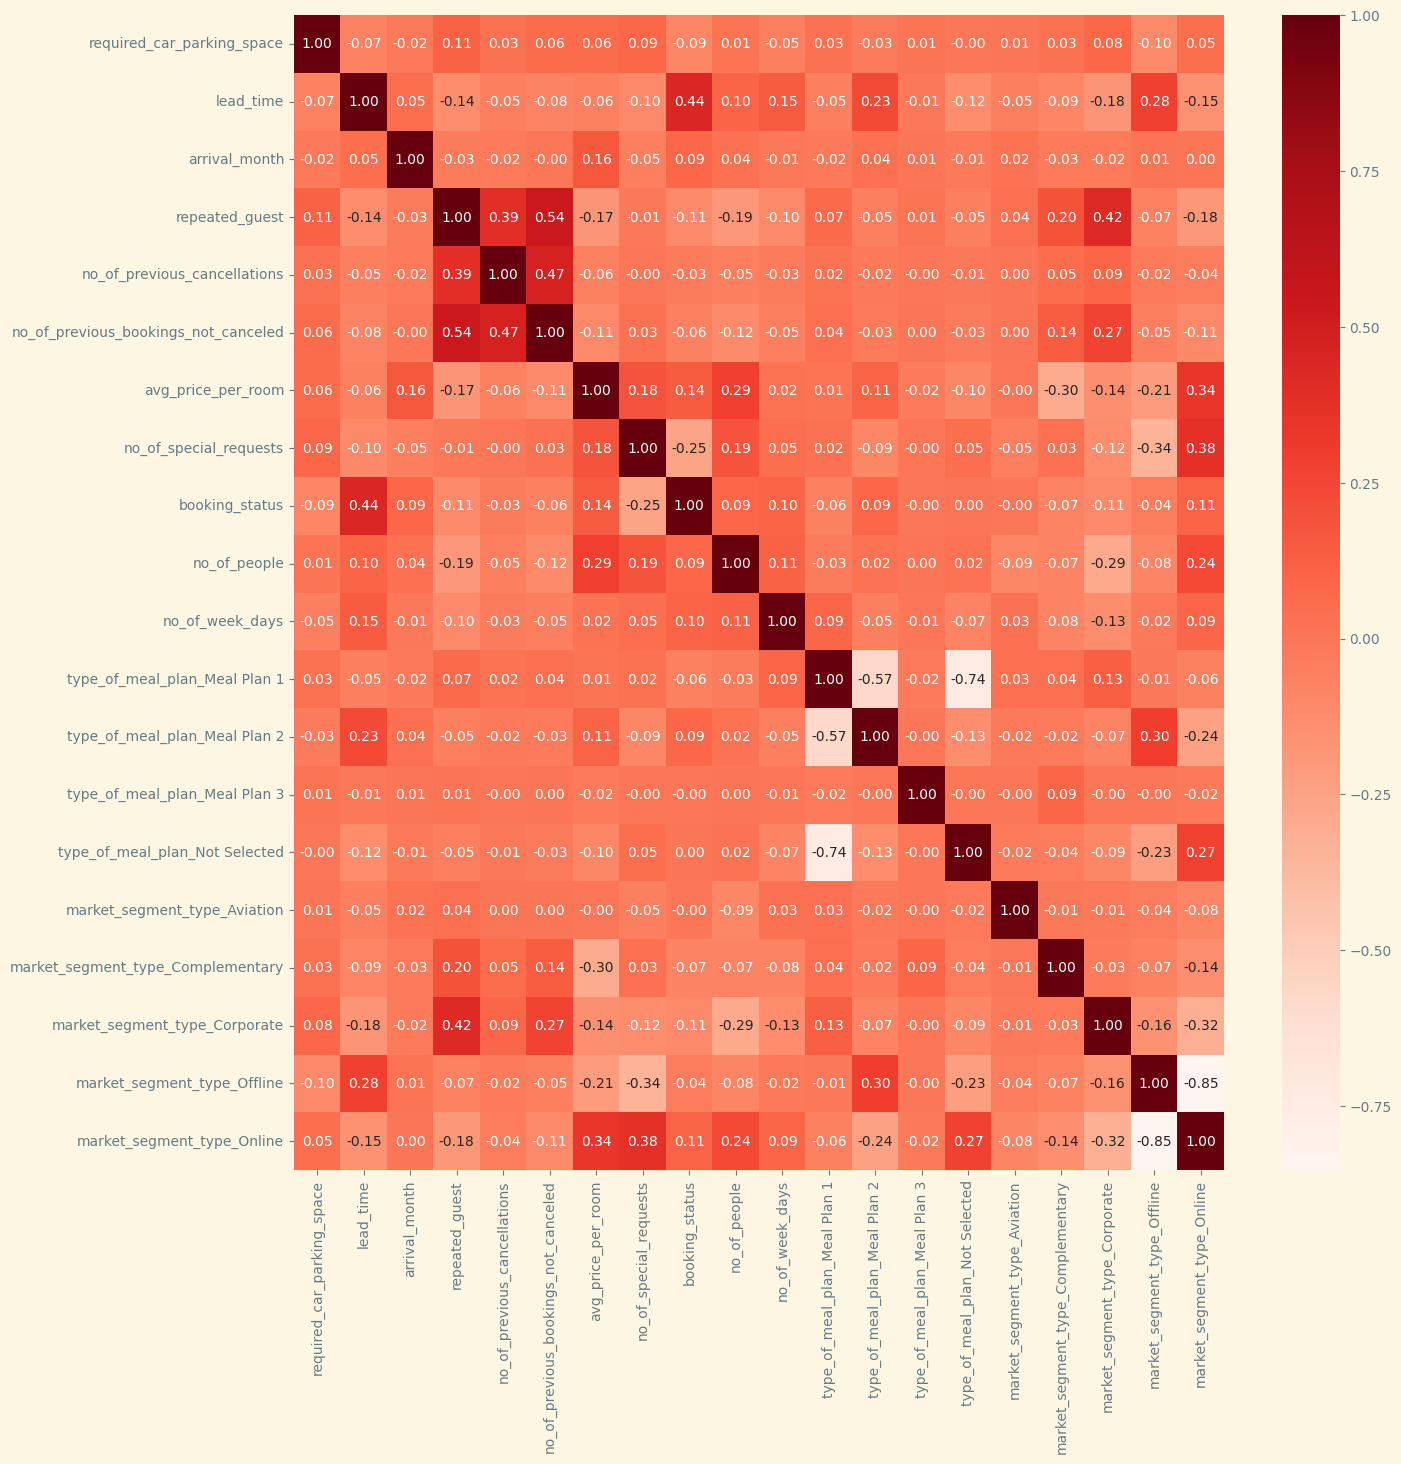

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap = 'Reds')

Mai sus avem o matrice de corelatie asemanatoare, putand vizualiza legatura dintre variabile pentru a intelege care sunt importante si care nu in analiza noastra. Aici, avem introduse toate variabilele din setul de date.

Vom exclude cateva coloane irelevante.



In [32]:
df.drop(columns=['type_of_meal_plan_Meal Plan 3','type_of_meal_plan_Not Selected',
                 'market_segment_type_Aviation',"market_segment_type_Complementary","market_segment_type_Offline"],inplace=True)

df.head()

,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_people,no_of_week_days,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,market_segment_type_Corporate,market_segment_type_Online
0,0,1.532110,0,0,0,0,-0.867758,0.0,0,0.000000,0.000000,True,False,False,False
1,0,-0.477064,0,0,0,0,0.182116,1.0,0,0.000000,0.642547,False,False,False,True
2,0,-0.513761,0,0,0,0,-0.993703,0.0,1,-25.914924,-0.452484,True,False,False,True
3,0,1.412844,1,0,0,0,0.013854,0.0,1,0.000000,-0.095031,True,False,False,True
4,0,-0.082569,1,0,0,0,-0.124685,0.0,1,0.000000,-0.547516,False,False,False,True


Definirea variabilelor independente x si a variabilei dependente y.

In [33]:
x = df.drop(columns="booking_status") # data de intrare
y = df.booking_status # eticheta(labels)

Impartirea datasetului in seturi de antrenament si test.

In [34]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)
print("Train_y value counts :\n",train_y.value_counts())

Train_x : (29020, 14)
Test_x : (7255, 14)
Train_y : (29020,)
Test_y : (7255,)
Train_y value counts :
 booking_status
0    19551
1     9469
Name: count, dtype: int64


<b><i>MODELARE SI EVALUARE

Regresia logistica

Regresia logistica este o tehnica utilizata pentru a prezice rezulatele variabilei dependente binare. Este adesea folosita in contexte in care dorim sa intelegem influenta variabilelor independentei asupra probabilitatii unui rezultat binar.
Metrici de evaluare:
- Acuratetea (Accuracy): Procentul de predictii corecte facute de model.
- AUC-ROC: Aria de sub curba caracteristica de operare a receptorului (ROC curve), care este o masura a performantei generale a modelului.
- Matricea de confuzie: Ofera detalii despre numarul de predictii corecte si eronate facute de model.

Regresia logistica poate fi supusa regularizarii pentru a preveni overfitting-ul. Acest lucru se realizeaza prin adaugarea unor termeni de penalizare pentru coeficientii modelului.

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Accuracy of Logistic Regression : % {}".format(logreg.score(test_x,test_y)*100))

Accuracy of Logistic Regression : % 80.15161957270848


C:\Users\Crina Maria\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(classification_report(train_y,logreg.predict(train_x)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     19551
           1       0.74      0.61      0.67      9469

    accuracy                           0.80     29020
   macro avg       0.78      0.75      0.76     29020
weighted avg       0.80      0.80      0.80     29020



Am facut raportul si pentru datele de train pentru a compara acuratetea.

In [37]:
print(classification_report(test_y,logreg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4839
           1       0.75      0.61      0.67      2416

    accuracy                           0.80      7255
   macro avg       0.78      0.75      0.76      7255
weighted avg       0.80      0.80      0.80      7255



Rezultatele testului de clasificare logistica:
- s-a opbtinut o performanta generala buna
- precizia medie, recall-ul si f1-score sunt toate peste 0.80. 

Acest lucru sugereaza ca modelul este capabil sa clasifice corect majoritatea exemplelor din setul de date.
Pentru clasa 1, rezervarile anulate, modelul are o precizie mai mica decat clasa 0, rezervarile neanulate, care au o precizie de 0.82. Semnificativ, atat recall-ul, cat si f1-score-ul au un scor mai mare pentru rezervarile anulate.

Acuratetea clasificarii este de 80%.
Suportul reprezinta numarul de exemple din setul de date care apartin fiecarei clase.

Random Forest Classifier

Random Forest Classifier este un algoritm de invatare supervizata utilizat pentru probleme de clasificare, dar si pentru regresie. Este bazat pe ideea de a combina multipli arbori de decizie intr-un singur model mai puternic si robust. Fiecare arbore de decizie este antrenat pe o submultime aleatoare a setului de date si foloseste o submultime aleatoare a caracteristicilor. Această aleatorizare ajuta la crearea de arbori de decizie care sunt relativ independenti unii de altii, reducand astfel riscul de overfitting.

Observatii:
- Buna scalabilitate: Poate fi eficient aplicat pe seturi de date mari si variate.
- Rezistentă la overfitting
- Performanta mai buna

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x, train_y)
print("Random Forest Calssifier: % {}".format(rf.score(test_x,test_y)*100))

Random Forest Calssifier: % 89.08339076498967


In [39]:
print(classification_report(train_y,rf.predict(train_x)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19551
           1       0.99      0.98      0.99      9469

    accuracy                           0.99     29020
   macro avg       0.99      0.99      0.99     29020
weighted avg       0.99      0.99      0.99     29020



In [40]:
print(classification_report(test_y,rf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4839
           1       0.86      0.80      0.83      2416

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



Raportul modelului Random Forest pe setul de date a dat un rezultat bun, acuratetea generala de 89%, ceea ce inseamna ca a avut un comportament adecvat pentru prezicere.

Modelul pare sa aiba o performanta mai buna la clasa 0 decat la clasa 1 in ceea ce priveste atat recall-ul, cat si f1-score-ul. Scorile F1 ridicate totusi la ambele clase indica un bun echilibru intre precizie si recall

K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) este un algoritm de invatare supervizata utilizat atat pentru probleme de clasificare, cat si pentru regresie. Algoritmul se bazeaza pe ideea ca obiectele similare sunt adesea in proximitate in spatiul caracteristicilor.
<b><i>Distanta euclidiana = masurarea distantei dintre puncte apropiate in spatiul carcateristicilor</b></i>

Observatii:
- lazy learning
- simplu de inteles si implementat
- sensibil la scala variabila a caracteristicilor (e recomandata scalabilitatea)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

train_x, temp_x, train_y, temp_y = train_test_split(x, y, test_size=0.3, random_state=42)  # 70% train, 30% temporar

# Impartirea datasetului in seturi de antrenament, validare si test
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=42)  # 15% validare, 15% test

print("Train_x:", train_x.shape)
print("Val_x:", val_x.shape)
print("Test_x:", test_x.shape)
print("Train_y:", train_y.shape)
print("Val_y:", val_y.shape)
print("Test_y:", test_y.shape)

# cream o instanta KNN
knn = KNeighborsClassifier()

# Definirea unui interval de valori k pentru a fi testate (vecini)
param_grid = {'n_neighbors': range(1, 31)}

# Grid search cu corss-validation pe setul de antrenament, folosit pentru a gasi cel mai bun vecin (k)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# valoare optima a lui k
best_knn = grid_search.best_estimator_
print("Best k:", grid_search.best_params_['n_neighbors'])

# Evaluarea pe setul de validare
val_accuracy = best_knn.score(val_x, val_y)
print("Validation Accuracy of KNN: % {}".format(val_accuracy * 100))

val_y_pred = best_knn.predict(val_x)
print(classification_report(val_y, val_y_pred))

Train_x: (25392, 14)
Val_x: (5441, 14)
Test_x: (5442, 14)
Train_y: (25392,)
Val_y: (5441,)
Test_y: (5442,)
Best k: 4
Validation Accuracy of KNN: % 85.46223120749862
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3680
           1       0.85      0.67      0.75      1761

    accuracy                           0.85      5441
   macro avg       0.85      0.81      0.82      5441
weighted avg       0.85      0.85      0.85      5441



Rezultatele din tabel arata ca modelul de clasificare KNN a obtinut o performanta generala buna. Precizia medie, reamintirea medie si scorul F1 mediu sunt toate peste 0,85. Acest lucru sugereaza ca modelul este capabil sa clasifice corect majoritatea exemplelor din setul de date.

Cu toate acestea, exista o oarecare variatie in performanta modelului pe clase diferite. De exemplu, modelul are o precizie mai mare (0,90) pentru clasa 0 decat pentru clasa 1 (0,85). Acest lucru sugereaza ca modelul este mai bun la identificarea corecta a exemplelor din clasa 0 decat a exemplelor din clasa 1.

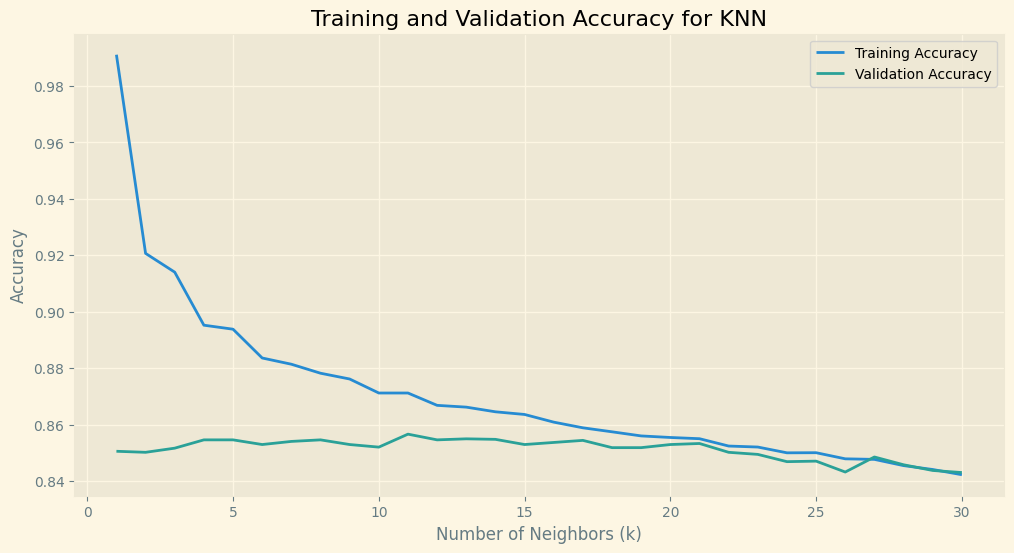

Test Accuracy of KNN: % 85.18926865123116
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3596
           1       0.86      0.68      0.76      1846

    accuracy                           0.85      5442
   macro avg       0.85      0.81      0.82      5442
weighted avg       0.85      0.85      0.85      5442



In [42]:
# Plotarea curbelor de invatare pentru acuratete
train_scores = []
val_scores = []

for k in range(1, 31):
    # se creeaza un model KNN cu k vecini
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    # se calc si se stocheaza acuratetea modelului pe setul de date de antrenament si de validare
    train_scores.append(knn.score(train_x, train_y))
    val_scores.append(knn.score(val_x, val_y))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), train_scores, label='Training Accuracy')
plt.plot(range(1, 31), val_scores, label='Validation Accuracy')
plt.title('Training and Validation Accuracy for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluarea pe setul de date
test_accuracy = best_knn.score(test_x, test_y)
print("Test Accuracy of KNN: % {}".format(test_accuracy * 100))

test_y_pred = best_knn.predict(test_x)
print(classification_report(test_y, test_y_pred))

Graficul prezentat ilustreaza performanta algoritmului KNN (K Nearest Neighbors) in ceea ce priveste acuratetea antrenamentului si acuratetea validarii pe un set de date specific.

Observatii:

Acuratetea antrenamentului (linia albastra) este in general mai mare decat acuratetea validarii (linia verde). Acest lucru indica faptul ca modelul se potriveste prea bine datelor de antrenament si nu generalizeaza bine la datele necunoscute.
Acuratetea ambelor linii scade treptat pe masura ce creste numarul de vecini (k). Acest lucru sugereaza ca valorile mai mici ale lui k ar putea fi mai potrivite pentru acest set de date.

Este posibil ca o valoare mai mica a lui k sa duca la o mai buna generalizare a modelului si la o acuratete mai mare a validarii.

Graficul prezinta o performanta moderata a algoritmului KNN pe setul de date respectiv. Exista loc de imbunatatire, care poate fi obtinut prin ajustarea parametrilor modelului, analiza setului de date si implementarea de tehnici de regularizare.

Informatii suplimentare:

Algoritmul KNN este un algoritmul de invatare automata supravegheata care clasifica punctele noi pe baza asemanarii lor cu punctele din setul de antrenament.
Acuratetea este o masura a performantei unui model de invatare automata. Se calculeaza ca procentul de predictii corecte facute de model.
Supra-potrivirea este un fenomen care apare atunci cand un model de invatare automata se potriveste prea bine datelor de antrenament si nu generalizeaza bine la datele necunoscute.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Definirea modelelor intr-un dictionar
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Antrenarea si evaluarea modelelor
results = {}
# se antreneaza pe setul de date, apoi se genereaza predictii pe setul de date de testare
# se calculeaza acuratetea si scorul si se stocheaza rezultatele in results
for model_name, model in models.items():
    model.fit(train_x, train_y)
    predict_y = model.predict(test_x)
    accuracy = accuracy_score(test_y, predict_y)
    auc = roc_auc_score(test_y, predict_y)
    results[model_name] = {'accuracy': accuracy, 'auc': auc}

# Afisarea rezultatelor
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']}, AUC = {metrics['auc']}")


C:\Users\Crina Maria\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.7991547225284822, AUC = 0.7535160049025219
Decision Tree: Accuracy = 0.8513414185961043, AUC = 0.8350525201349278
Random Forest: Accuracy = 0.8838662256523337, AUC = 0.8601904487591245
Gradient Boosting: Accuracy = 0.844542447629548, AUC = 0.804731723101508
XGBoost: Accuracy = 0.8776185226019846, AUC = 0.8516404106163463
